# Data Fetching and Cleaning

## Introduction

In this notebook we will fetch the dataset and clean the necessary parts

### Infoemation about the Dataset

Dataset is based on the AMiner V12 database. The database can be downloaded from https://www.aminer.org/citation

The Predictors (Inputs): 
The Target (Output): 'n_citation' (number of citations)


## Plan of Attack:
1- Analyze the Raw Data from papers.csv authors.cvs orgs.csv
2- Analyze the Features from feature.csv and check the correlations

### Adding the libraries

In [1]:
import pandas as pd
import matplotlib as plt
import ast
import numpy as np
import seaborn as sns
from statistics import mean

### Adding the Database

In [2]:
data_papers = pd.read_pickle('../Data/papers.pkl')
data_papers.head()

,Unnamed: 0,id,authors,title,year,n_citation,page_start,page_end,doc_type,publisher,volume,issue,doi,indexed_abstract,fos,venue,references,alias_ids
0,0,1883489,"[{'name': 'Orazio Miglino', 'org': 'Seconda Un...",Behavioural Trajectories of Adaptive Mobile Ro...,2001.0,0,22,27.0,Conference,IOS Press,NaN,NaN,NaN,"{'IndexLength': 234, 'InvertedIndex': {'equiva...","[{'name': 'Cognitive map', 'w': 0.51094}, {'na...","{'raw': 'Scandinavian Conference on AI', 'id':...",NaN,NaN
1,1,1888009,"[{'name': 'Qiao Liu', 'id': 2311584535}, {'nam...",Functional modeling of process systems for int...,2001.0,0,685,689.0,Conference,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Computer science', 'w': 0.41495}, {...",{'raw': 'International Conference on Human-Com...,NaN,NaN
2,2,1900505,"[{'name': 'Islam Shdaifat', 'id': 2303763467},...",Viseme recognition using multiple feature matc...,2001.0,0,2431,2434.0,Conference,NaN,NaN,NaN,NaN,"{'IndexLength': 135, 'InvertedIndex': {'small'...","[{'name': 'Line segment', 'w': 0.45362}, {'nam...",{'raw': 'Conference of the International Speec...,"[1488183088, 1547339340, 2045266328, 210288002...",NaN
3,3,1800840,"[{'name': 'Irna M. R. Evangelista Filha', 'id'...",Querying Semistructured Data By Example: The Q...,2001.0,28,156,163.0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Computer science', 'w': 0.43741}, {...",{'raw': 'Workshop on Information Integration o...,NaN,NaN
4,4,1887734,"[{'name': 'J. Ramanujam', 'org': 'Louisiana St...",Integer lattice based methods for local addres...,2001.0,0,597,645.0,NaN,"Springer, Berlin, Heidelberg",NaN,NaN,10.1007/3-540-45403-9_17,"{'IndexLength': 236, 'InvertedIndex': {'(non-u...","[{'name': 'Linear combination', 'w': 0.51501},...",{'raw': 'Compiler optimizations for scalable p...,"[154696699, 1485615235, 1527919631, 1562081118...",NaN


Lets Analyse each column:

In [3]:
print("The shape of the data is: ", str(data_papers.shape))
data_papers.dtypes

The shape of the data is:  (81364, 18)


Unnamed: 0           object
id                    int64
authors              object
title                object
year                float64
n_citation           object
page_start           object
page_end            float64
doc_type             object
publisher            object
volume               object
issue                object
doi                  object
indexed_abstract     object
fos                  object
venue                object
references           object
alias_ids            object
dtype: object

most of the data consist of Integers and Strings which is analyzed as object. Moreover, we know that n_citation is the type int64 but due to some data inconsistancies it is showing as an Object. We will try to clean the data first.

Now lets understand the basic statistical details like count, percentile, mean, std, max and min vlaues for the number of citaions.

In [4]:
# first checking for Null values
data_papers['n_citation'].isnull().sum()

# fill the null vlaue with zero (0)
data_papers['n_citation'] = data_papers['n_citation'].fillna(0)

# check the data agian for null value
data_papers['n_citation'].isnull().sum()


0

One of the rows had the value of 'object' instead of the actual n_citaion value. We will drop that row.

In [5]:
# data_papers = data_papers.drop(data_papers.index[[78782]])

Some of the rows have the citaion value in String format while others are in the Int format. We change all the values into integers for consistancy

In [6]:
data_papers['n_citation'] = pd.to_numeric(data_papers['n_citation'])
data_papers['n_citation']

0         0
1         0
2         0
3        28
4         0
         ..
81359     3
81360     0
81361     0
81362     2
81363     0
Name: n_citation, Length: 81363, dtype: int64

In [7]:
data_papers.dtypes

Unnamed: 0           object
id                    int64
authors              object
title                object
year                float64
n_citation            int64
page_start           object
page_end            float64
doc_type             object
publisher            object
volume               object
issue                object
doi                  object
indexed_abstract     object
fos                  object
venue                object
references           object
alias_ids            object
dtype: object

Now we see that the n_ciation type is an int64

In [9]:
data_papers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81363 entries, 0 to 81363
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        81363 non-null  object 
 1   id                81363 non-null  int64  
 2   authors           81363 non-null  object 
 3   title             81363 non-null  object 
 4   year              81362 non-null  float64
 5   n_citation        81363 non-null  int64  
 6   page_start        75252 non-null  object 
 7   page_end          72454 non-null  float64
 8   doc_type          72846 non-null  object 
 9   publisher         69948 non-null  object 
 10  volume            44152 non-null  object 
 11  issue             29957 non-null  object 
 12  doi               63238 non-null  object 
 13  indexed_abstract  69235 non-null  object 
 14  fos               80977 non-null  object 
 15  venue             80558 non-null  object 
 16  references        57544 non-null  object

In [10]:
data_papers['n_citation'].describe()

count    81363.000000
mean        34.280779
std        212.628479
min          0.000000
25%          1.000000
50%          7.000000
75%         24.000000
max      34741.000000
Name: n_citation, dtype: float64

Looking at the data, the mean value for citations is about 13 while the median is 3. this shows the data is fairly 
skewed. It shows half of the papers have lower than 3 citaions while 75% of the data have lower than 9 citation.

- We suspect the max value 42080 can be an outlier


Lets look into the largest values of the dataset and how many times they were repeated.

In [11]:
top = data_papers['n_citation'].sort_values(ascending=False).head(30)
top_dict = list(zip(top.index, top.values))
top_dict

[(73941, 34741),
 (65937, 17261),
 (79704, 13391),
 (66936, 12574),
 (58727, 12305),
 (61816, 9358),
 (52207, 7527),
 (67913, 7157),
 (64934, 6719),
 (46663, 6692),
 (63661, 6676),
 (66461, 6324),
 (60587, 5707),
 (64419, 5663),
 (9458, 5638),
 (48837, 5460),
 (67284, 5404),
 (38049, 5253),
 (81022, 5155),
 (62556, 5099),
 (15907, 4840),
 (69790, 4455),
 (20602, 4186),
 (62061, 4102),
 (54276, 3993),
 (58463, 3957),
 (26865, 3862),
 (54017, 3810),
 (54645, 3633),
 (50517, 3436)]

Plot the Citations vs number they have been used

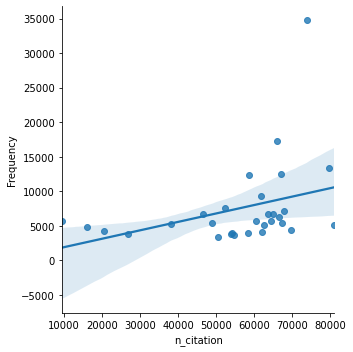

In [12]:
top_df = pd.DataFrame(top_dict, columns =['n_citation', 'Frequency']) 
sns.lmplot( x='n_citation', y='Frequency', data = top_df)

Lets Also Analyze the number of citations vs. the year of publication (this takes 5 min to complete)

<BarContainer object of 81363 artists>

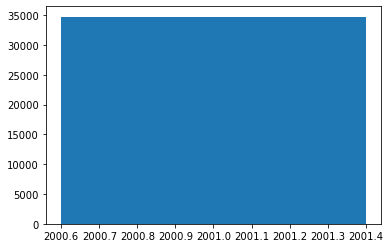

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
# get x and y data 
year = data_papers['year']
citation = data_papers['n_citation'] 
# create bar chart 
ax.bar(year, citation) 
# # set title and labels 
# ax.set_title('Wine Review Scores') 
# ax.set_xlabel('Ciataion') 
# ax.set_ylabel('Frequency')

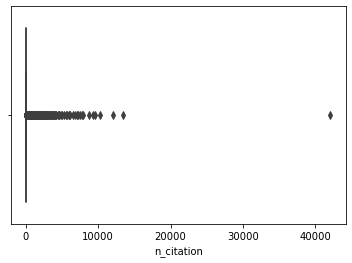

In [53]:
# print(data_papers.boxplot(column='year'))
sns.boxplot(x=data_papers['n_citation'])

Here we can visually see that most of the citations are close to 3-10 and there are skewed data between 10-15000. There is also a surge of data in abour 40000 citations

### Adding the Current Features

In [3]:
data_features = pd.read_csv('../Data/features100.csv')
data_features.head()

,Unnamed: 0,id,doc_type,journal_publications,organization_num,prev_citation_sum,faculty_impact,productivity,title_length,H_index,...,journal_percent,conference_percent,patent_percent,book_percent,paper_len,avg_cite,n_papers,n_references,n_authors,n_citation
0,0,100001334,NaN,NaN,0,NaN,NaN,1,9,1,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3,2
1,1,1000018889,Conference,NaN,2,NaN,1.0,2,10,1,...,0.0,0.0,0.0,0.0,13.0,NaN,1.0,12.0,4,2
2,2,1000022707,Journal,NaN,0,NaN,NaN,1,9,0,...,0.0,0.0,0.0,0.0,9.0,NaN,NaN,2.0,1,0
3,3,100004108,Conference,NaN,1,NaN,0.0,1,9,0,...,0.0,0.0,0.0,0.0,8.0,NaN,1.0,9.0,2,0
4,4,10000571,Conference,NaN,2,NaN,1.0,1,11,1,...,0.0,0.0,0.0,0.0,8.0,NaN,1.0,7.0,3,5


### Saving the temp dataframes for later use 

We can use 'feather' to save the dataFrames into binary which later can be loaded. much more efficient than saving using CSV

### TO-DOs
read the below for feature engineering:
- https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114


### Ideas to save the RAM space

1- memory optimization step we can perform already at this point (assuming we know our table structure by now) 
   is specifying the columns data types during the import (via the dtype= input parameter).

```
df = pd.read_csv(‘data/clickstream_data.tsv’, 
    delimiter=’\t’,
    names=[‘coming_from’, ‘article’, ‘referrer_type’, ‘n’],
    dtype={
        ‘referrer_type’: ‘category’, 
        ’n’: ‘uint32’}
)
```

2- using the python Dask library which uses parallel computing and supports dask dataframs.
3- migrate the data into postgreSQL and write quaries. it can be connected into your jupyter notebook.


source: https://towardsdatascience.com/how-to-handle-large-datasets-in-python-with-pandas-and-dask-34f43a897d55
